In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pyspark import Row
#Construct data flow
#import sql
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif']=['SimHei']
get_ipython().magic('matplotlib inline')

path = './handle_data/'
save_path = './image/'

In [6]:

# Read dataset
def read_dataset(filename):
    
    filename_read = os.path.join(path,filename)
    return sc.textFile(filename_read)

# remover header
def removeHeader(dataset):
    header = dataset.first()
    remove_header = dataset.filter(lambda x : x != header)
    return remove_header

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


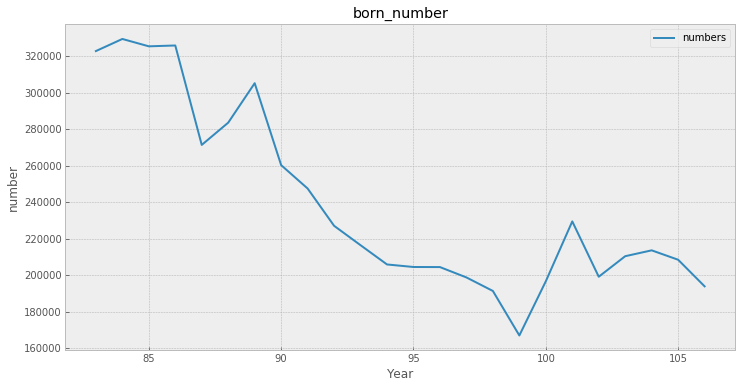

In [3]:
#read born data
file_born = os.path.join(path,"baby.xlsx")
born_data = pd.read_excel(file_born)


plt.style.use('ggplot')
plt.style.use('bmh')


born_data.plot(x="Year",y='numbers',kind='line',figsize=(12,6),title='born_number')

plt.ylabel("number")
plt.xlabel("Year")
plt.savefig(os.path.join(save_path,'born.png'))


In [11]:
University_data_103 = read_dataset("103_student.csv")
University_data_104 = read_dataset("104_student.csv")
University_data_105 = read_dataset("105_student.csv")
University_data_106 = read_dataset("106_student.csv")

University_registered_105 = read_dataset("105Registration_rate.csv")
University_registered_106 = read_dataset("106Registration_rate.csv")

University_data_103 = removeHeader(University_data_103)
University_data_104 = removeHeader(University_data_104)
University_data_105 = removeHeader(University_data_105)
University_data_106 = removeHeader(University_data_106)

University_registered_105 = removeHeader(University_registered_105)
University_registered_106 = removeHeader(University_registered_106)

#dataset split
data_103 = University_data_103.map(lambda line : line.split(','))
data_104 = University_data_104.map(lambda line : line.split(','))
data_105 = University_data_105.map(lambda line : line.split(','))
data_106 = University_data_106.map(lambda line : line.split(','))
registered_105_data = University_registered_105.map(lambda line : line.split(','))
registered_106_data = University_registered_106.map(lambda line : line.split(','))

In [15]:
sqlContext = SQLContext(sc)
#creat students' table
def CreatStudentTable(dataset):
    dataset =  dataset.map(lambda p:
                       Row(
                           Unumber = int(p[0]),
                           Name = str(p[1]),
                           StudyClassification = str(p[2]),
                           Degree = str(p[3]),
                           studentNumber = int(p[4])
                       ))
    return dataset

def CreatRegisteredTable(dataset):
    dataset = dataset.map(lambda p:
                        Row(
                            System = str(p[1]),
                            SchoolClass = str(p[2]),
                            Name = str(p[3]),
                            StudyClassification = str(p[4]),
                            Degree = str(p[5]),
                            Rate = float(p[6])
                            ))
    return dataset


In [17]:
student_number_103 = CreatStudentTable (data_103)
student_number_104 = CreatStudentTable (data_104)
student_number_105 = CreatStudentTable (data_105)
student_number_106 = CreatStudentTable (data_106)

registered_105 = CreatRegisteredTable(registered_105_data)
registered_106 = CreatRegisteredTable(registered_106_data)

student_103_df = sqlContext.createDataFrame(student_number_103)
student_104_df = sqlContext.createDataFrame(student_number_104)
student_105_df = sqlContext.createDataFrame(student_number_105)
student_106_df = sqlContext.createDataFrame(student_number_106)

student_103_df.registerTempTable("student_103")
student_104_df.registerTempTable("student_104")
student_105_df.registerTempTable("student_105")
student_106_df.registerTempTable("student_106")

In [18]:
registered_105_df = sqlContext.createDataFrame(registered_105)
registered_106_df = sqlContext.createDataFrame(registered_106)

registered_105_df.registerTempTable("registered_105")
registered_106_df.registerTempTable("registered_106")

In [105]:
studentNumbers_103 = sqlContext.sql("""SELECT S_3.Degree,sum(S_3.studentNumber) Num_103
                                    FROM student_103 S_3
                                    GROUP BY Degree""")

studentNumbers_104 = sqlContext.sql("""SELECT sum(studentNumber) Num_104
                                    FROM student_104 
                                    GROUP BY Degree""")

studentNumbers_105 = sqlContext.sql("""SELECT sum(studentNumber) Num_105
                                    FROM student_105 
                                    GROUP BY Degree""")

studentNumbers_106 = sqlContext.sql("""SELECT sum(studentNumber) Num_106
                                    FROM student_106  
                                    GROUP BY Degree""")

studentNumbers_103 = studentNumbers_103.toPandas()
studentNumbers_104 = studentNumbers_104.toPandas()
studentNumbers_105 = studentNumbers_105.toPandas()
studentNumbers_106 = studentNumbers_106.toPandas()


studentNumbers = studentNumbers_103.join(studentNumbers_104,rsuffix="Num_104")
studentNumbers = studentNumbers.join(studentNumbers_105,rsuffix="Num_105")
studentNumbers = studentNumbers.join(studentNumbers_106,rsuffix="Num_106")
studentNumbers
Image = studentNumbers.set_index("Degree")
Image = Image.T
Image


#Image['Num_103'].plot(kind='bar',title="Student_Numbers_103",figsize=(20,10))
#
#plt.show()

Degree   4 Bachelor  Master  others  2 Associate  5 Associate  Doctor  \
Num_103      486309  172968     511         9786        89484   30549   
Num_104      481079  170428     454         8323        89143   29333   
Num_105      466050  169538     668         7259        88425   28821   
Num_106      447171  168783     658         6061        84777   28346   

Degree   Bachelor  2 Bachelor  
Num_103    513500       36742  
Num_104    517653       36032  
Num_105    512529       36151  
Num_106    503130       34968

In [106]:
Image.cumsum()
Image.plot(figsize=(18,9))
plt.savefig(os.path.join(save_path,'fig-5.png'))
plt.show()

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [ ]:
studentNumbers_104 = sqlContext.sql("""SELECT S_4.Degree,sum(studentNumber) Num_104
                                    FROM student_104 S_4
                                    GROUP BY  S_4.Degree """)

studentNumbers_105 = sqlContext.sql("""SELECT S_5.Degree,sum(studentNumber) Num_105
                                    FROM student_105 S_5
                                    GROUP BY  S_5.Degree """)

studentNumbers_106 = sqlContext.sql("""SELECT S_6.Degree,sum(studentNumber) Num_106
                                    FROM student_106 S_6
                                    GROUP BY  S_6.Degree """)
studentNumbers.show()

SchoolClass  NaN  公立  私立
count          2   6  12

In [124]:
Numbers_105 = sqlContext.sql("""SELECT Unumber,Name,sum(studentNumber) Numbers
                                FROM student_105 as S
                                GROUP BY Unumber, Name""")
school_class_105 = sqlContext.sql("""SELECT distinct Name,System, SchoolClass
                                FROM registered_105""")
Semester_105 = Numbers_105.join(school_class_105,Numbers_105.Name == school_class_105.Name,"leftouter")
Less_than_3000_105 = Semester_105.filter((Semester_105["Numbers"]<=3000))
Image = Less_than_3000_105.select('SchoolClass').groupBy('SchoolClass').count()
Image_pandas = Image.toPandas().set_index("SchoolClass")
Image_pandas.T

SchoolClass  公立  私立
count         5  15

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


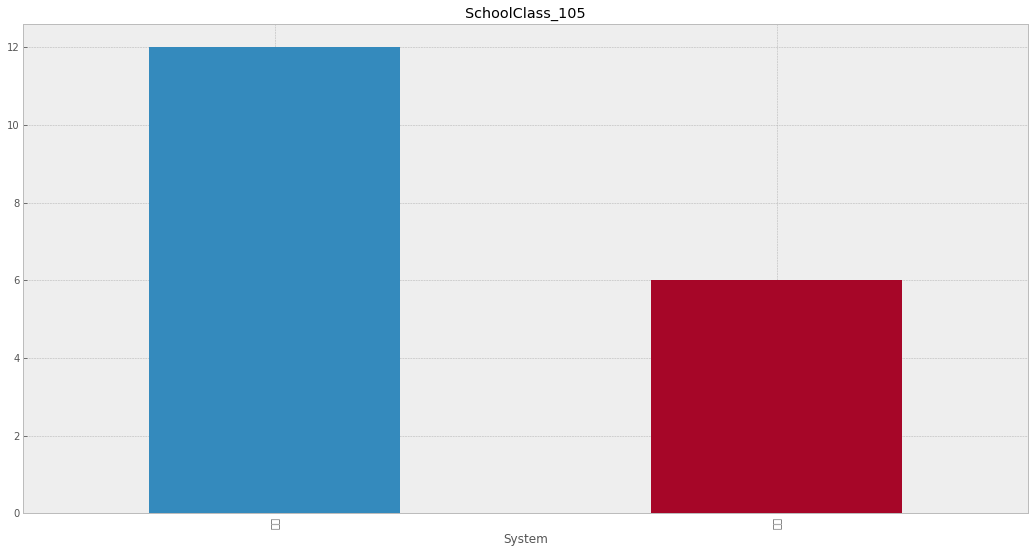

In [143]:
Image_pandas['count'].plot(kind='bar', title='SchoolClass_105',figsize=(18,9))
plt.savefig(os.path.join(save_path,"fig-6.png"))
plt.show()

In [130]:
Image = Less_than_3000_105.select('S.Name','Numbers')
Image_pandas = Image.toPandas()
Image_pandas

Name  Numbers
0   國立臺南護理專科學校     1944
1       慈濟科技大學     2924
2       南榮科技大學     2904
3       國立體育大學     2437
4     中信金融管理學院      331
5       蘭陽技術學院     1463
6       大同技術學院     2434
7    稻江科技暨管理學院     2186
8       法鼓文理學院      238
9     亞太創意技術學院     1410
10      崇右技術學院     2912
11    國立臺南藝術大學     1529
12      臺灣觀光學院     1300
13    國立臺東專科學校     1263
14  育英醫護管理專科學校     1962
15    國立臺灣戲曲學院      627
16        華梵大學     2746
17       馬偕醫學院      648
18  高美醫護管理專科學校      771
19      大漢技術學院     1497

In [126]:
Numbers_106 = sqlContext.sql("""SELECT Unumber,Name,sum(studentNumber) Numbers
                                FROM student_106 as S
                                GROUP BY Unumber, Name""")
school_class_106 = sqlContext.sql("""SELECT distinct Name,System, SchoolClass
                                FROM registered_106""")
Semester_106 = Numbers_106.join(school_class_106,Numbers_106.Name == school_class_106.Name,"leftouter")

Less_than_3000_106 = Semester_106.filter((Semester_106["Numbers"]<=3000))
Image = Less_than_3000_106.select('SchoolClass').groupBy('SchoolClass').count()
Image_pandas = Image.toPandas().set_index("SchoolClass")
Image_pandas.T

SchoolClass  公立  私立
count         5  18

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


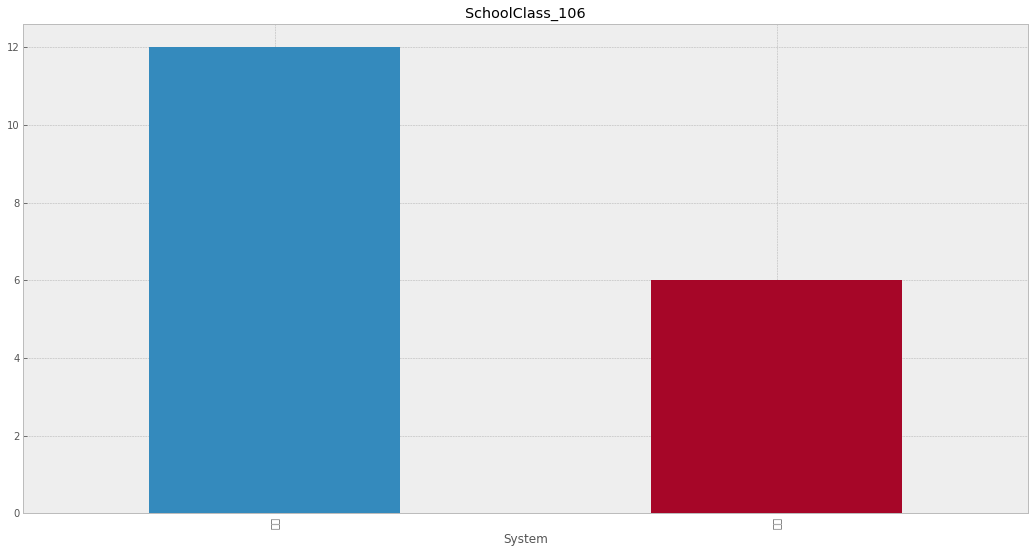

In [144]:
Image_pandas['count'].plot(kind='bar', title='SchoolClass_106',figsize=(18,9))
plt.savefig(os.path.join(save_path,"fig-7.png"))
plt.show()

In [131]:
Image = Less_than_3000_106.select('S.Name','Numbers')
Image_pandas = Image.toPandas()
Image_pandas

Name  Numbers
0   國立臺南護理專科學校     1955
1       慈濟科技大學     2947
2       南榮科技大學     2211
3       台灣首府大學     2730
4       國立體育大學     2464
5     中信金融管理學院      485
6       蘭陽技術學院     1058
7       大同技術學院     2112
8    稻江科技暨管理學院     2267
9       法鼓文理學院      267
10    亞太創意技術學院      894
11      和春技術學院     2475
12    國立臺南藝術大學     1580
13      大華科技大學     2940
14      臺灣觀光學院      896
15    國立臺東專科學校     1244
16  育英醫護管理專科學校     1969
17    國立臺灣戲曲學院      614
18        華梵大學     2320
19       馬偕醫學院      666
20  高美醫護管理專科學校      590
21    崇右影藝科技大學     2685
22      大漢技術學院     1305

In [134]:
Less_than_3000_105 = Semester_105.filter((Semester_105["Numbers"]<=3000) & (Semester_105['SchoolClass'] == '私立') )
Less_than_3000_105_Pandas = Less_than_3000_105.toPandas()
Image = Less_than_3000_105.select('System').groupBy('System').count()

Image_pandas = Image.toPandas().set_index("System")
Image_pandas.T


System  技職  一般
count   10   5

In [146]:
Numbers_Name_105 =Less_than_3000_105.select('S.Name','Numbers')

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


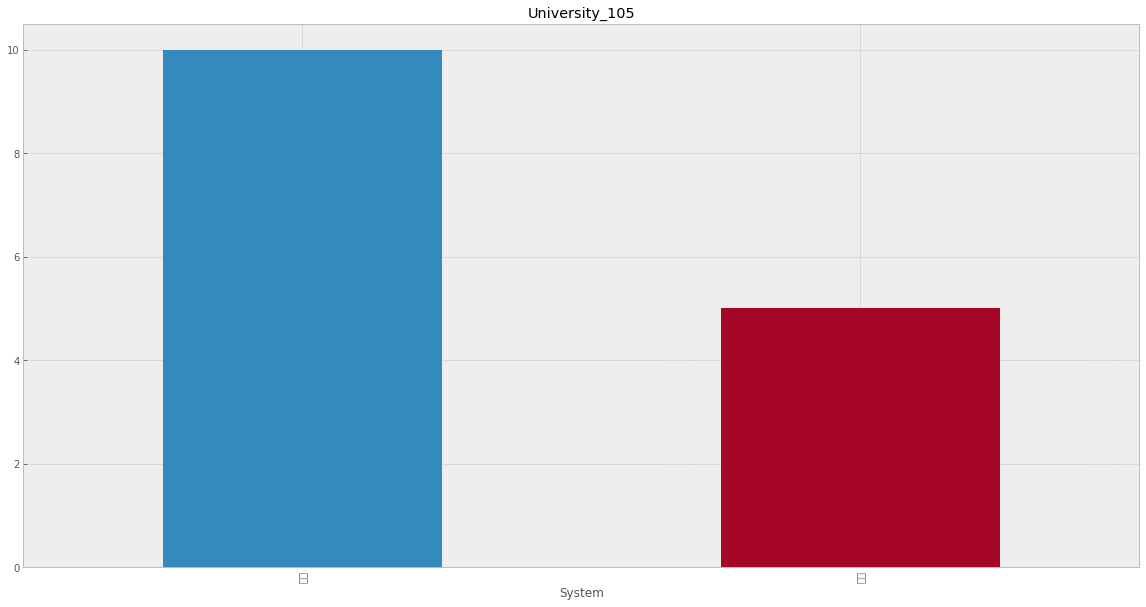

In [136]:
Image_pandas['count'].plot(kind='bar',title="University_105",figsize=(20,10))
plt.savefig(os.path.join(save_path,'fig-2.png'))
plt.show()

In [137]:
Less_than_3000_106 = Semester_106.filter((Semester_106['Numbers']<=3000) & (Semester_106['SchoolClass']=='私立'))
Image = Less_than_3000_106.select('System').groupBy('System').count()
Image_pandas = Image.toPandas().set_index("System")
Image_pandas.T


System  技職  一般
count   12   6

In [138]:
Numbers_Name_106 = Less_than_3000_106.select('S.Name')

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


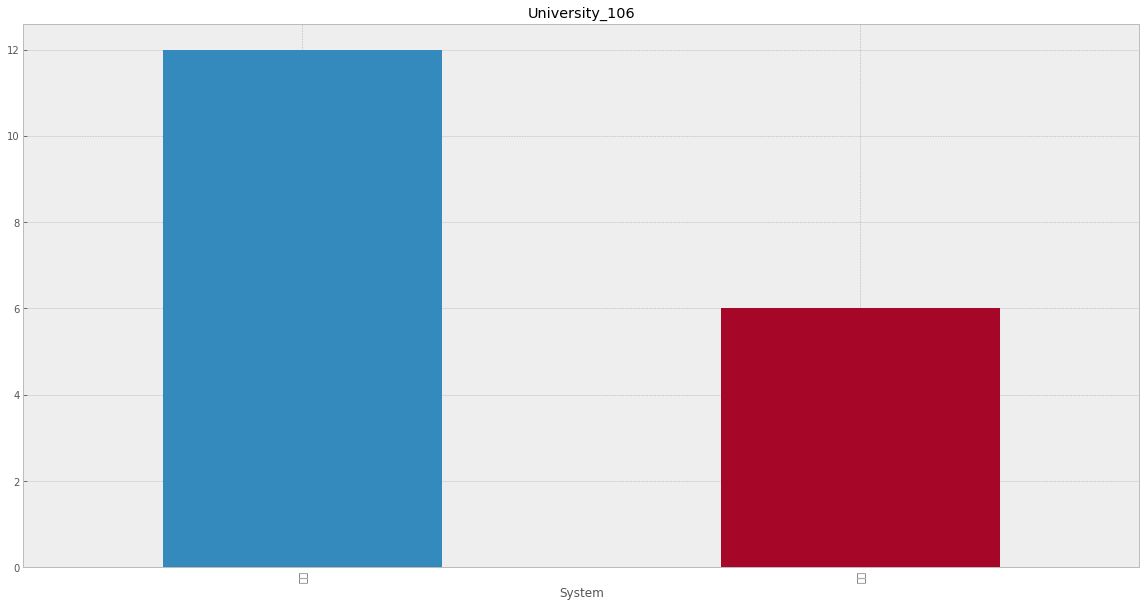

In [112]:
Image_pandas['count'].plot(kind='bar',title="University_106",figsize=(20,10))
plt.savefig(os.path.join(save_path,'fig-3.png'))
plt.show()

In [139]:
Rate = sqlContext.sql("""SELECT  R5.Name R_N,R5.SchoolClass,R5.Rate 105_Rate,R6.Rate 106_Rate,R5.Degree
                  FROM registered_105 as R5, registered_106 as R6
                  WHERE   R5.Name = R6.Name and R5.Rate<60 and R6.Rate<60  and R5.StudyClassification = R6.StudyClassification  
                          and R5.StudyClassification ='D 日' and R5.Degree = R6.Degree """)
Rate_count = Rate.select('Degree').groupBy('Degree').count()
Rate_count_Pandas = Rate_count.toPandas().set_index("Degree")
Rate_count_Pandas.T

Degree  4 Bachelor  Master  5 Associate  Bachelor  2 Bachelor
count            8       4            4         3           5

D:\Ancaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


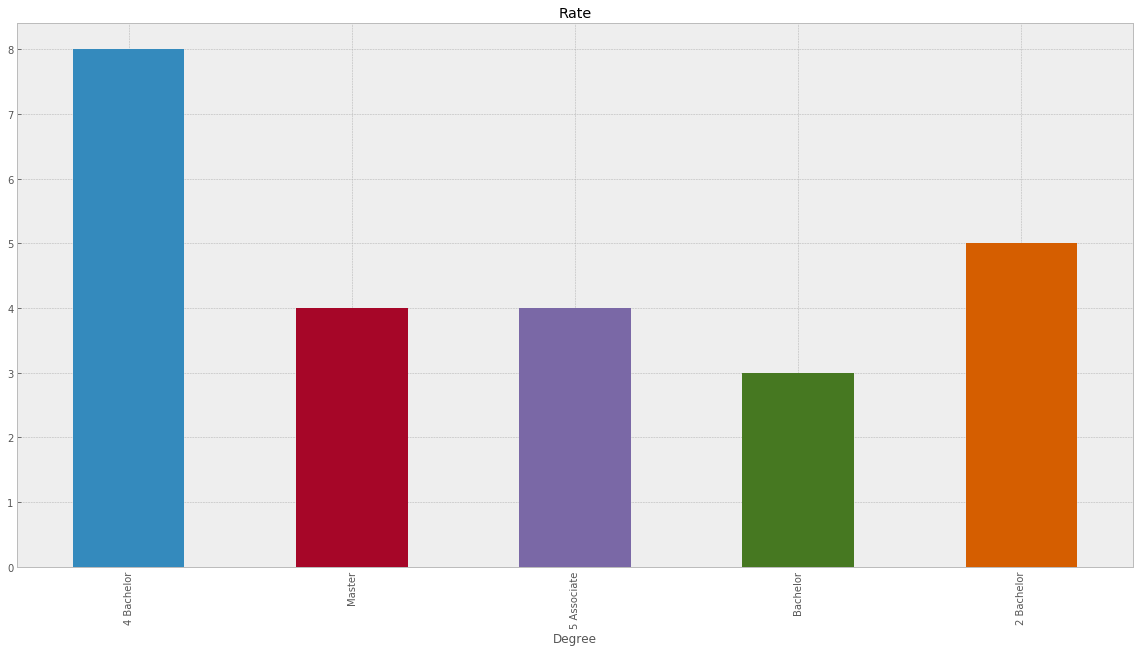

In [140]:
Rate_count_Pandas['count'].plot(kind='bar', title='Rate',figsize=(20,10))
plt.savefig(os.path.join(save_path,"fig-4.png"))
plt.show()

In [147]:
Name_less_than = Rate.join(Numbers_Name_105, Rate.R_N == Numbers_Name_105.Name, 'inner')
Name_less_than = Name_less_than.join(Numbers_Name_106 , Name_less_than.R_N ==Numbers_Name_106.Name, 'inner')
Name_less_than.select('R_N','SchoolClass','105_Rate','106_Rate','Degree','Numbers').toPandas()

R_N SchoolClass  105_Rate  106_Rate       Degree  Numbers
0    南榮科技大學          私立     30.53     22.00  5 Associate     2904
1    南榮科技大學          私立     18.74     22.07   4 Bachelor     2904
2  亞太創意技術學院          私立     46.15      6.00   4 Bachelor     1410
3    臺灣觀光學院          私立     53.33     53.33       Master     1300
4    臺灣觀光學院          私立     29.52     25.00  5 Associate     1300
5    臺灣觀光學院          私立     47.73     17.84   4 Bachelor     1300
6      華梵大學          私立     43.84     27.27     Bachelor     2746
7    大漢技術學院          私立     40.00      0.00   2 Bachelor     1497